### 快速开始
Pypi  
https://pypi.org/project/awscli/

AWS  
https://docs.aws.amazon.com/cli/latest/reference/#available-services

AWS CLI 配置文件使用方式     
https://docs.aws.amazon.com/zh_cn/cli/latest/userguide/cli-configure-profiles.html

AWS Command Line Interface  
https://docs.aws.amazon.com/zh_cn/cli/latest/userguide/cli-chap-services.html

`pip install awscli`

**1. Getting Started**   
Before using aws-cli, you need to tell it about your AWS credentials. You can do this in several ways:   

Environment variables   
Shared credentials file  
Config file  
IAM Role  
```
(ven363) ➜  ~ aws configure
AWS Access Key ID: foo
AWS Secret Access Key: bar
Default region name [us-west-2]: us-west-2
Default output format [None]: json


(ven363) ➜  ~ cat ~/.aws/credentials
[asg]
aws_access_key_id = AKIAJIxxx
aws_secret_access_key = JRxxx

[lsg]
aws_access_key_id = AKIAJIxxx
aws_secret_access_key = JRxxx

(ven363) ➜  ~ cat ~/.aws/config
[profile asg]
output = table
region = ap-southeast-1

[profile lsg]
output = table
region = ap-southeast-1

(ven363) ➜  ~ aws iam list-users  --profile lsg  # 要使用命名配置文件，请向您的命令添加 --profile profile-name 选项
```  

**tab补全代码**  
https://docs.aws.amazon.com/zh_cn/cli/latest/userguide/cli-configure-completion.html  

我的：   
```
(ven363) ➜  bin tail -n 1  ~/.zshrc  
source /Users/mac/venv/ven363/bin/aws_zsh_completer.sh  
```

**2. aws认证申请**  
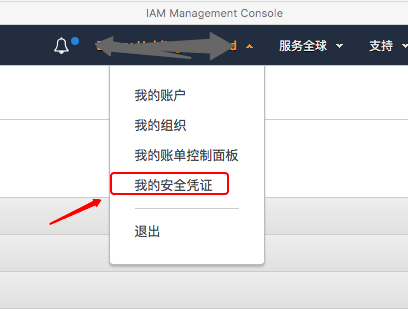


### ec2 
```
(ven363) ➜  ~ aws ec2 describe-instances --profile asg

```

```
创建实例:
https://docs.aws.amazon.com/zh_cn/cli/latest/userguide/cli-services-ec2-instances.html

aws ec2 run-instances --image-id ami-xxxxxxxx \
                             --subnet-id subnet-xxxxxxxx \
                             --security-group-ids sg-b018ced5 \
                             --count 1 \
                             --instance-type t2.micro \
                             --key-name devenv-key \
                             --query "Instances[0].InstanceId"

生成 CLI 框架和 CLI 输入 JSON 参数:
https://docs.aws.amazon.com/zh_cn/cli/latest/userguide/cli-usage-skeleton.html

(ven363) ➜ aws ec2 run-instances --generate-cli-skeleton
{
    "BlockDeviceMappings": [
        {
            "DeviceName": "",
            "VirtualName": "",
            "Ebs": {
                "DeleteOnTermination": true,
                "Iops": 0,
                "SnapshotId": "",
                "VolumeSize": 0,
                "VolumeType": "gp2",
                "Encrypted": true,
                "KmsKeyId": ""
            },
            "NoDevice": ""
        }
    ],
    "ImageId": "",
    "InstanceType": "r5a.24xlarge",
    "Ipv6AddressCount": 0,
    "Ipv6Addresses": [
        {
            "Ipv6Address": ""
        }
    ],
    "KernelId": "",
    "KeyName": "",
    "MaxCount": 0,
    "MinCount": 0,
    "Monitoring": {
        "Enabled": true
    },
    "Placement": {
        "AvailabilityZone": "",
        "Affinity": "",
        "GroupName": "",
        "PartitionNumber": 0,
        "HostId": "",
        "Tenancy": "host",
        "SpreadDomain": ""
    },
    "RamdiskId": "",
    "SecurityGroupIds": [
        ""
    ],
    "SecurityGroups": [
        ""
    ],
    "SubnetId": "",
    "UserData": "",
    "AdditionalInfo": "",
    "ClientToken": "",
    "DisableApiTermination": true,
    "DryRun": true, #  DryRun 参数保留设置为 true 以使用 EC2 的空运行功能，这让您可以安全地测试命令而不实际创建或修改任何资源
    "EbsOptimized": true,
    "IamInstanceProfile": {
        "Arn": "",
        "Name": ""
    },
    "InstanceInitiatedShutdownBehavior": "stop",
    "NetworkInterfaces": [
        {
            "AssociatePublicIpAddress": true,
            "DeleteOnTermination": true,
            "Description": "",
            "DeviceIndex": 0,
            "Groups": [
                ""
            ],
            "Ipv6AddressCount": 0,
            "Ipv6Addresses": [
                {
                    "Ipv6Address": ""
                }
            ],
            "NetworkInterfaceId": "",
            "PrivateIpAddress": "",
            "PrivateIpAddresses": [
                {
                    "Primary": true,
                    "PrivateIpAddress": ""
                }
            ],
            "SecondaryPrivateIpAddressCount": 0,
            "SubnetId": ""
        }
    ],
    "PrivateIpAddress": "",
    "ElasticGpuSpecification": [
        {
            "Type": ""
        }
    ],
    "ElasticInferenceAccelerators": [
        {
            "Type": ""
        }
    ],
    "TagSpecifications": [
        {
            "ResourceType": "vpc",
            "Tags": [
                {
                    "Key": "",
                    "Value": ""
                }
            ]
        }
    ],
    "LaunchTemplate": {
        "LaunchTemplateId": "",
        "LaunchTemplateName": "",
        "Version": ""
    },
    "InstanceMarketOptions": {
        "MarketType": "spot",
        "SpotOptions": {
            "MaxPrice": "",
            "SpotInstanceType": "one-time",
            "BlockDurationMinutes": 0,
            "ValidUntil": "1970-01-01T00:00:00",
            "InstanceInterruptionBehavior": "stop"
        }
    },
    "CreditSpecification": {
        "CpuCredits": ""
    },
    "CpuOptions": {
        "CoreCount": 0,
        "ThreadsPerCore": 0
    },
    "CapacityReservationSpecification": {
        "CapacityReservationPreference": "none",
        "CapacityReservationTarget": {
            "CapacityReservationId": ""
        }
    },
    "HibernationOptions": {
        "Configured": true
    },
    "LicenseSpecifications": [
        {
            "LicenseConfigurationArn": ""
        }
    ]
}

(ven363) ➜  bin aws ec2 run-instances --cli-input-json file://ec2runinst.json
```


```
--query 选项筛选输出
使用以下命令仅显示 Volumes 列表中的第一个卷：
(ven363) ➜  aws ec2 describe-volumes --query 'Volumes[0]'
{
    "AvailabilityZone": "us-west-2a",
    "Attachments": [
        {
            "AttachTime": "2013-09-17T00:55:03.000Z",
            "InstanceId": "i-a071c394",
            "VolumeId": "vol-e11a5288",
            "State": "attached",
            "DeleteOnTermination": true,
            "Device": "/dev/sda1"
        }
    ],
    "VolumeType": "standard",
    "VolumeId": "vol-e11a5288",
    "State": "in-use",
    "SnapshotId": "snap-f23ec1c8",
    "CreateTime": "2013-09-17T00:55:03.000Z",
    "Size": 30
}

使用通配符表示法 [*] 循环访问列表中的所有卷，并筛选出每个卷中的三个元素：VolumeId、AvailabilityZone 和 Size。请注意，词典表示法要求您为每个 JSON 键提供一个别名，如：{Alias1:JSONKey1,Alias2:JSONKey2}。词典本身是无序的，因此，此结构中的键别名的顺序可能不一致。
$ aws ec2 describe-volumes --query 'Volumes[*].{ID:VolumeId,AZ:AvailabilityZone,Size:Size}'
[
    {
        "AZ": "us-west-2a",
        "ID": "vol-e11a5288",
        "Size": 30
    },
    {
        "AZ": "us-west-2a",
        "ID": "vol-2e410a47",
        "Size": 8
    }
]
```

In [ ]:
 m4.large  2 8   ->  c5.large  2 4
 m5.xlarge 4 16  ->  c5.xlarge 4 8 
 
 
 